In [1]:
%matplotlib inline 
%load_ext autoreload 
%autoreload 2

#from __future__ import (print_function, division, absolute_import)

import numpy as np

# Matplotlib related
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.rc('text', usetex=True)

import h5py


In [2]:
#data
data_dir='./Data/'

In [13]:
#read illustris file

filename = data_dir+'galaxies_star_maps.hdf5'
f = h5py.File(filename, 'r')

# List all keys
print("Keys: %s" % [key for key in f.keys()])
keys = [key for key in f.keys()]


Keys: ['cat_grp_id', 'cat_grp_is_primary', 'cat_grp_m200c', 'cat_grp_n', 'cat_sh_bh_mdot', 'cat_sh_halfmrad_gas', 'cat_sh_halfmrad_stars', 'cat_sh_id', 'cat_sh_mbh', 'cat_sh_mdm', 'cat_sh_metallicity', 'cat_sh_mgas', 'cat_sh_mstar', 'cat_sh_phot_B', 'cat_sh_phot_K', 'cat_sh_phot_U', 'cat_sh_phot_V', 'cat_sh_phot_g', 'cat_sh_phot_i', 'cat_sh_phot_r', 'cat_sh_phot_z', 'cat_sh_pos_bound', 'cat_sh_pos_cm', 'cat_sh_sfr', 'cat_sh_spin', 'cat_sh_vel', 'cat_sh_vmax', 'map_stars', 'map_stars_npixel', 'map_stars_nptl', 'map_stars_size']


In [12]:
#groups
group_ids = list(f[keys[0]])
print(group_ids)
#all the same group

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [14]:
#subhalos
sh_ids = list(f[keys[7]])
print(sh_ids)
#all different subhalos

[0, 1, 2, 3, 4, 5, 6, 8, 9, 10]


In [15]:
# Load general simulation and galaxy properties
f = h5py.File(filename, 'r')
snap_a = f.attrs['snap_a']
n_galaxies = len(f['cat_sh_id'])
sh_idx = np.array(f['cat_sh_id'])
grp_idx = np.array(f['cat_grp_id'])
cat_is_primary = np.array(f['cat_grp_is_primary'])
cat_sh_mstar = np.array(f['cat_sh_mstar'])
cat_sh_pos_bound = np.array(f['cat_sh_pos_bound'])
cat_sh_halfmrad_stars = np.array(f['cat_sh_halfmrad_stars'])
map_stars = np.array(f['map_stars'])
map_size = f['map_stars_size'].value
n_pixels = f['map_stars_npixel'].value
f.close()

print('Found %d galaxies, scale factor %.2f. Maps are %.1f kpc in size, %d pixels.' \
    % (n_galaxies, snap_a, map_size, n_pixels))

Found 10 galaxies, scale factor 1.00. Maps are 300.0 kpc in size, 200 pixels.


In [21]:
print(map_stars.shape) #nh*3*3*npix*npix  #Surf. dens. of M* for SH/group/fuzz, xy-xz-yz proj.
print(len(map_stars))
print(len(map_stars[0]))
print(len(map_stars[0][0]))
print(len(map_stars[0][0][0]))

(10, 3, 3, 200, 200)
10
3
3
200


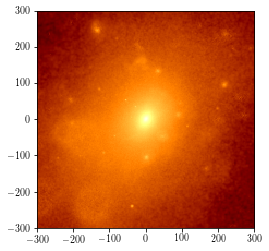

In [27]:
map_min = 1E4
map_max = 1E10
cmap = plt.cm.afmhot
data=np.array(map_stars[0,0,0,:,:])
data[data < map_min] = map_min
data[data > map_max] = map_max
data = np.log10(data)
vmin = np.log10(map_min)
vmax = np.log10(map_max)
norm = mpl.colors.Normalize(vmin = vmin, vmax = vmax)
plt.imshow(data.T, extent = [-map_size, map_size, -map_size, map_size], interpolation = 'nearest', cmap = cmap, vmin = vmin, vmax = vmax)


In [ ]:
#plot Illustris profile vs. HSC